# Problem Statement
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

DataSet [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/222/bank+marketing)

| Variable Name | Type        | Description                                                  | NA   |
| ------------- | ----------- | ------------------------------------------------------------ | ---- |
| age           | Integer     |                                                              | no   |
| job           | Categorical | type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') | no   |
| marital       | Categorical | marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed) | no   |
| education     | Categorical | (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') | no   |
| default       | Binary      | has credit in default?                                       | no   |
| balance       | Integer     | average yearly balance                                       | no   |
| housing       | Binary      | has housing loan?                                            | no   |
| loan          | Binary      | has personal loan?                                           | no   |
| contact       | Categorical | contact communication type (categorical: 'cellular','telephone') | yes  |
| day_of_week   | Date        | last contact day of the week                                 |      |
| month         | Date        | last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') | no   |
| duration      | Integer     | last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. | no   |
| campaign      | Integer     | number of contacts performed during this campaign and for this client (numeric, includes last contact) | no   |
| pdays         | Integer     | number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted) | yes  |
| previous      | Integer     | number of contacts performed before this campaign and for this client | no   |
| poutcome      | Categorical | outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') | yes  |
| y             | Binary      | has the client subscribed a term deposit?                    |      |

# Import

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import warnings
warnings.filterwarnings("ignore") 
from sklearn.preprocessing import StandardScaler

# Load Data and merge

In [3]:
df_additional = pd.read_csv("bank+marketing/bank-additional/bank-additional-full.csv", delimiter=";")

In [4]:
df_full = pd.read_csv("bank+marketing/bank/bank-full.csv", delimiter=";")

In [5]:
df_additional.sample(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
25500,29,admin.,divorced,basic.9y,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
20989,30,technician,married,professional.course,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no


In [6]:
df_additional.shape

(41188, 21)

In [7]:
df_full.sample(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
18068,50,entrepreneur,married,tertiary,no,230,no,no,telephone,30,jul,1089,4,-1,0,unknown,yes
4821,33,management,married,tertiary,no,3090,yes,no,unknown,21,may,162,1,-1,0,unknown,no


In [8]:
df_full.shape

(45211, 17)

In [9]:
da_col = df_additional.columns.tolist()
df_col = df_full.columns.tolist()

In [10]:
[x for x in da_col if x not in df_col]

['day_of_week',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [11]:
[x for x in df_col if x not in da_col]

['balance', 'day']

In [12]:
df = pd.merge(df_additional, df_full[['balance', 'day']], left_index=True, right_index=True)

In [13]:
df.sample(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,balance,day
27221,52,services,married,basic.9y,unknown,yes,no,cellular,nov,fri,...,1,failure,-0.1,93.200,-42.0,4.021,5195.8,no,0,21
19855,29,admin.,single,university.degree,unknown,yes,no,cellular,aug,fri,...,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no,6880,8


# Cleaning

In [14]:
df.duplicated().sum()

0

In [15]:
def infosnapshot(df):
    na_count = df.isna().sum()
    data_types = df.dtypes
    unique_count = df.nunique()
    unique_values = df.agg(['unique']).T['unique']
    return pd.concat([data_types.rename("Data Types"), na_count.rename("NA Count"), unique_count.rename("Unique Count") ,unique_values.rename("Unique Values")], axis=1)     

In [16]:
infosnapshot(df)

,Data Types,NA Count,Unique Count,Unique Values
age,int64,0,78,"[56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 5..."
job,object,0,12,"[housemaid, services, admin., blue-collar, tec..."
marital,object,0,4,"[married, single, divorced, unknown]"
education,object,0,8,"[basic.4y, high.school, basic.6y, basic.9y, pr..."
default,object,0,3,"[no, unknown, yes]"
housing,object,0,3,"[no, yes, unknown]"
loan,object,0,3,"[no, yes, unknown]"
contact,object,0,2,"[telephone, cellular]"
month,object,0,10,"[may, jun, jul, aug, oct, nov, dec, mar, apr, ..."
day_of_week,object,0,5,"[mon, tue, wed, thu, fri]"


<div class="alert alert-block alert-warning">
- No null values in any column.
- No Duplicate data in dataset    
</div>

# EDA

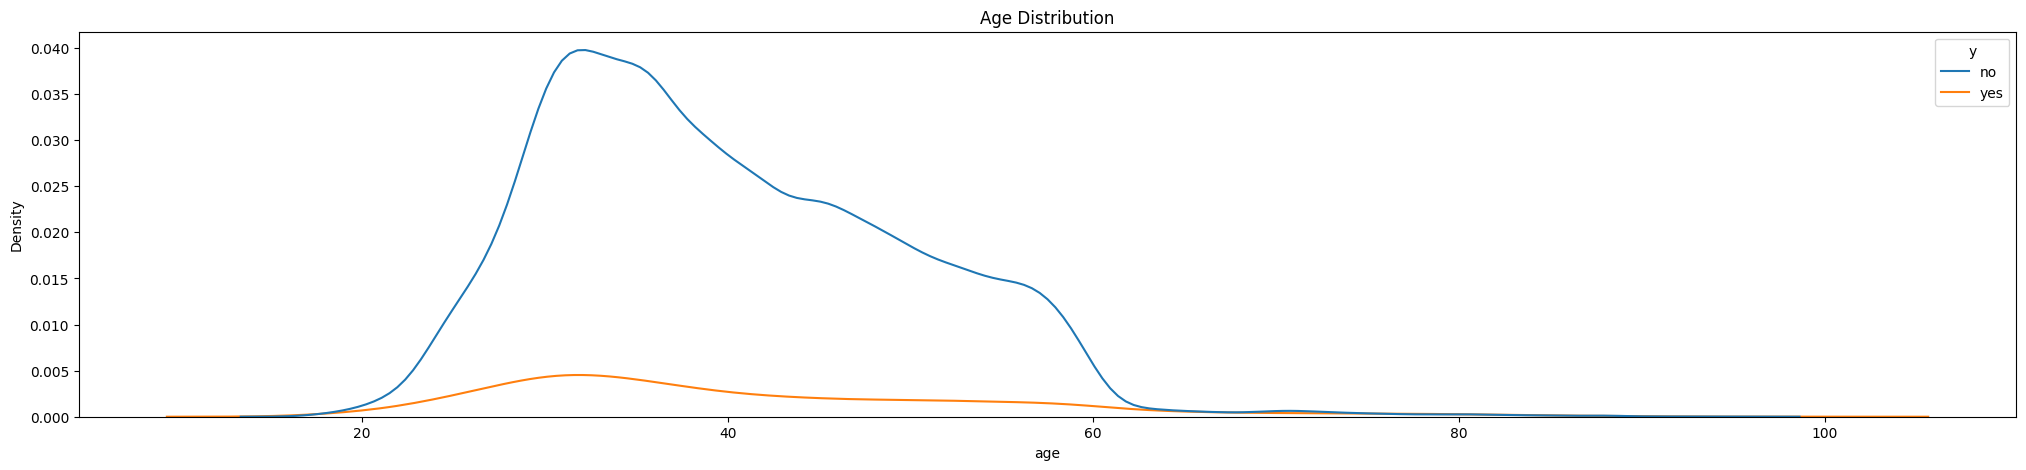

In [17]:
fix, ax = plt.subplots(figsize=(25, 5))
sns.kdeplot(x='age', data=df, hue='y')
plt.title("Age Distribution")
plt.show()

In [18]:
df.groupby('y')['y'].count()

y
no     36548
yes     4640
Name: y, dtype: int64

In [19]:
df = df.replace({"education":{'professional.course':'prof.course','university.degree': 'univ.grad.'}})

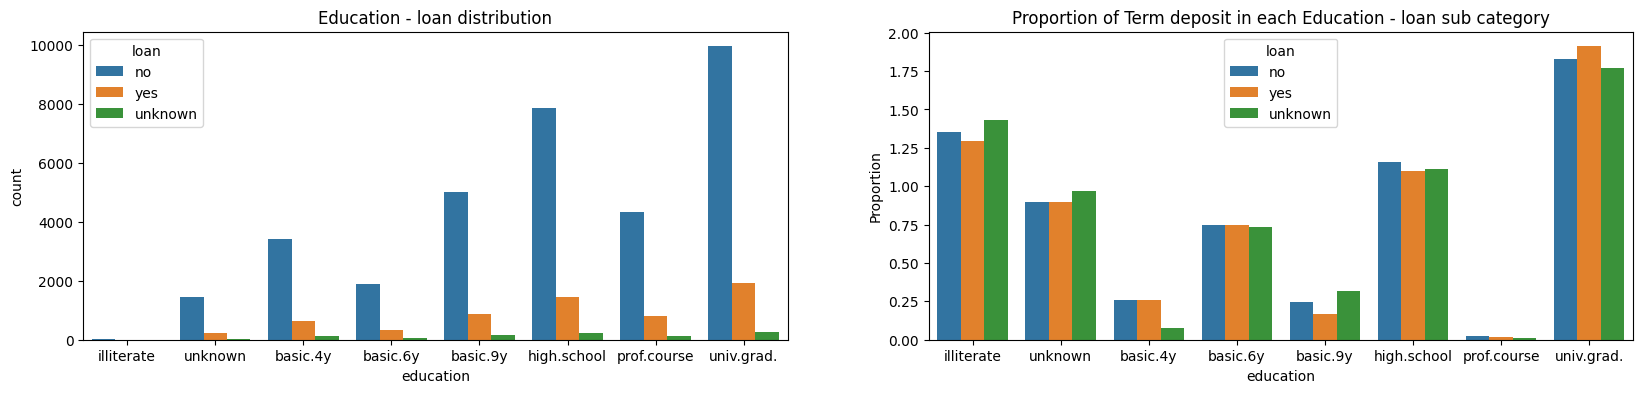

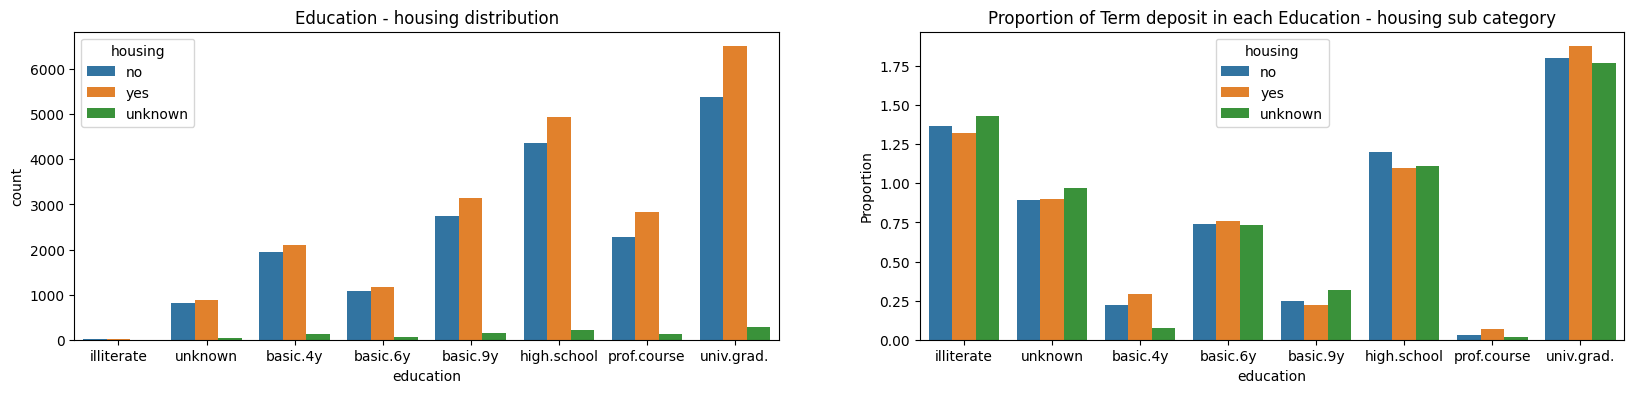

In [20]:

for sub_category in ['loan','housing']:
    fix, ax = plt.subplots(figsize=(20, 4), ncols=2) 
    
    sns.countplot(ax=ax[0], x='education', data=df, hue=sub_category , order = ['illiterate', 'unknown', 'basic.4y','basic.6y','basic.9y','high.school','prof.course','univ.grad.'])
    ax[0].set_title(f"Education - {sub_category} distribution")    

    result = df.groupby(['education', sub_category])[['y']].count().unstack(fill_value=0)
    result.columns = result.columns.droplevel(0)
    scaler = StandardScaler()
    scaled_values = scaler.fit_transform(result) 
    
    scaled_df = pd.DataFrame(scaled_values, columns=result.columns, index=result.index)
    scaled_df = np.abs(scaled_df).reset_index()
    
    scaled_df = scaled_df.melt(id_vars=['education'], value_vars=['no', 'yes','unknown'])
    
    sns.barplot(ax=ax[1], x='education', hue=sub_category, y='value', data=scaled_df, order = ['illiterate', 'unknown', 'basic.4y','basic.6y','basic.9y','high.school','prof.course','univ.grad.'])
    ax[1].set_ylabel("Proportion")
    ax[1].set_title(f"Proportion of Term deposit in each Education - {sub_category} sub category")   
#    plt.xticks(rotation=45);
    fix.show()

<div class="alert alert-block alert-info">
<h5>Personal Loan and Housing Loan count depend on the education.</h5>
</div>

Text(0.5, 1.0, 'Day Distribution')

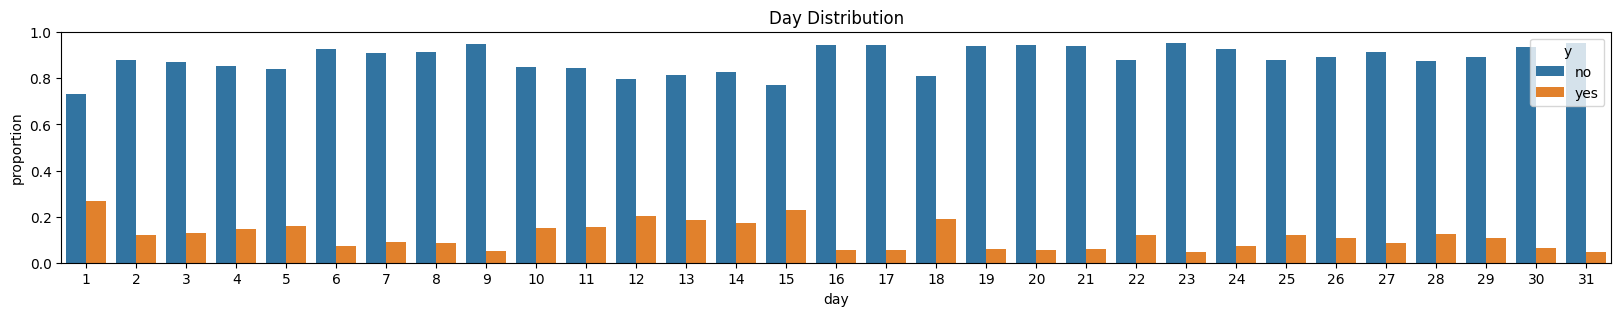

In [21]:
data = df.groupby(['day'])[['y']].value_counts(normalize=True).reset_index()
fix, ax = plt.subplots(figsize=(20, 3)) 
sns.barplot(data, x = 'day', y = 'proportion', hue = 'y')
plt.title('Day Distribution')

Text(0.5, 1.0, 'Day of Week Distribution')

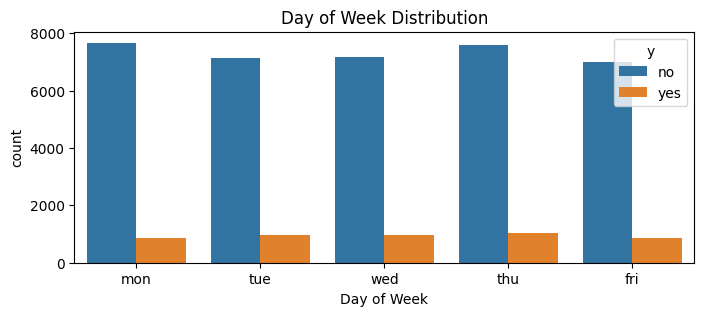

In [22]:
fix, ax = plt.subplots(figsize=(8, 3)) 
sns.countplot(x='day_of_week', data=df, hue='y')
plt.xlabel("Day of Week")
plt.title("Day of Week Distribution")

In [23]:
df = df.drop(columns=['day_of_week'])

<div class="alert alert-block alert-info">
<h4>Day of week lacks variance, this column can be ignored.</h4>
</div>

Text(0.5, 1.0, 'Day of Week Distribution')

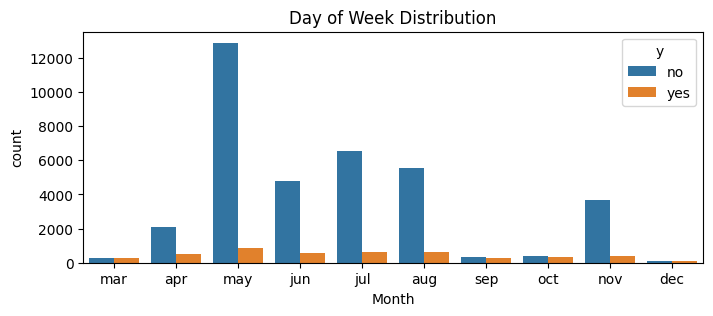

In [24]:
fix, ax = plt.subplots(figsize=(8, 3)) 
sns.countplot(x='month', data=df, hue='y', order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.xlabel("Month")
plt.title("Day of Week Distribution")

In [25]:
(df.loc[df['y']=='yes']['month'].value_counts(normalize=True)* 100).round(2).to_frame().T

month,may,aug,jul,jun,apr,nov,oct,mar,sep,dec
proportion,19.09,14.12,13.99,12.05,11.62,8.97,6.79,5.95,5.52,1.92


<div class="alert alert-block alert-info">
<h4>There is more likely person get term deposit in middle of calendar year.</h4>
</div>

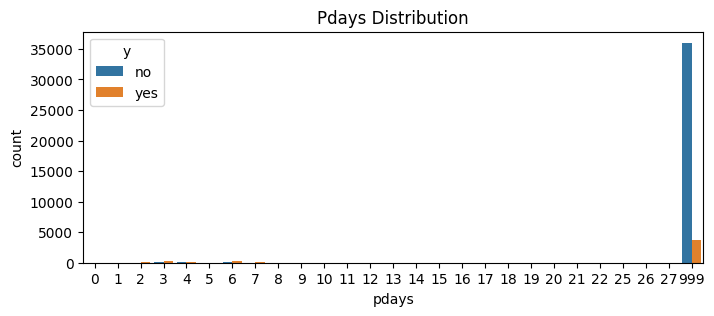

In [26]:
fix, ax = plt.subplots(figsize=(8, 3)) 
sns.countplot(x='pdays', data=df, hue='y')
plt.xlabel("pdays")
plt.title("Pdays Distribution");

In [27]:
pd.DataFrame((df.loc[df['y']=='yes'][['pdays']].value_counts(normalize=True)* 100).round(2).sort_index()).T

pdays,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,21,22,25,26,27,999
proportion,0.22,0.17,0.8,6.42,1.36,0.62,6.23,0.86,0.26,0.75,...,0.13,0.04,0.09,0.02,0.04,0.04,0.02,0.02,0.02,79.16


In [28]:
df = df.drop(columns=['pdays'])

<div class="alert alert-block alert-info">
<h4>pdays lacks variance, this column can be ignored.</h4>
</div>

In [29]:
upper = df['balance'].quantile(.75)
lower = df['balance'].quantile(.25)		
iqr = upper - lower

In [30]:
lower_bound_odo = lower - 1.5 * iqr				
upper_bound_odo = upper + 1.5 * iqr

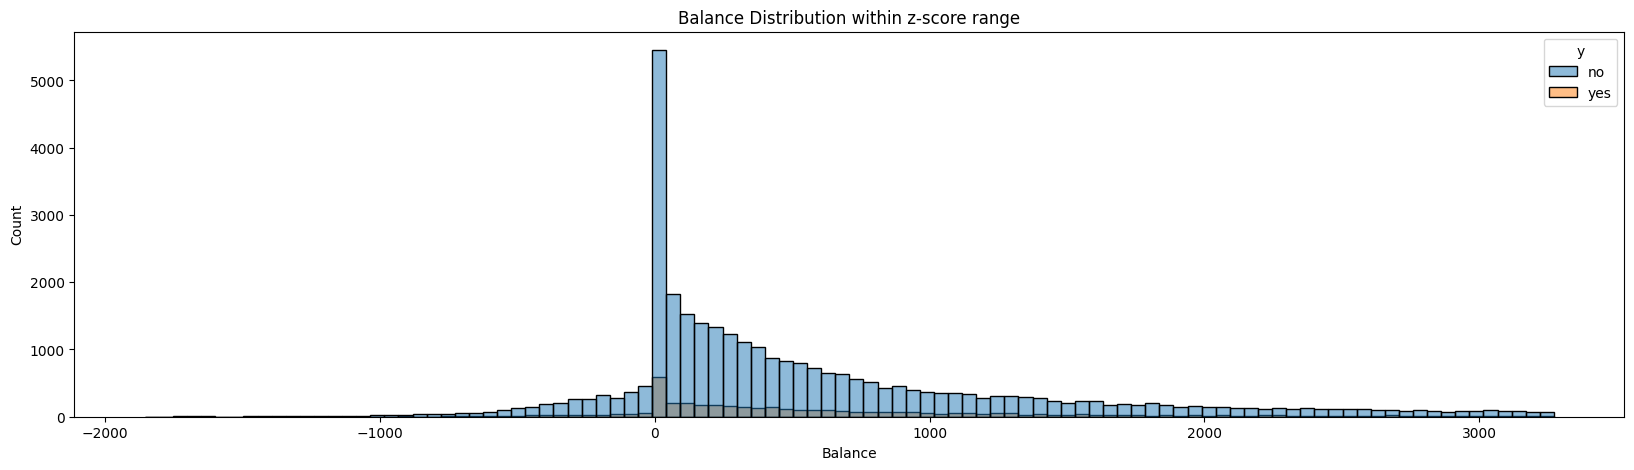

In [31]:
fix, ax = plt.subplots(figsize=(20, 5)) 
sns.histplot(x='balance', data=df.loc[(df['balance']<upper_bound_odo)&(df['balance']>lower_bound_odo)], hue='y', bins=100)
plt.xlabel("Balance")
plt.title("Balance Distribution within z-score range");

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()

In [34]:
df['balance_transform'] = scaler.fit_transform(df[["balance"]])

Text(0.5, 1.0, 'Balance Distribution with ')

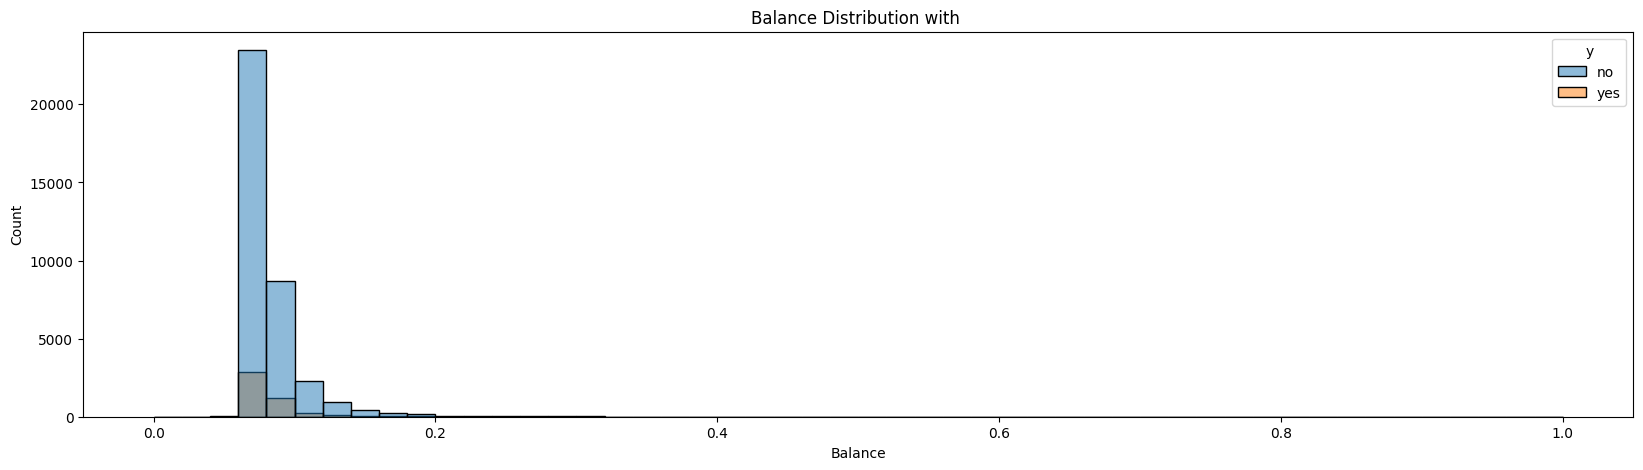

In [35]:
fix, ax = plt.subplots(figsize=(20, 5)) 
sns.histplot(x='balance_transform', data=df, hue='y', bins=50)
plt.xlabel("Balance")
plt.title("Balance Distribution with ")

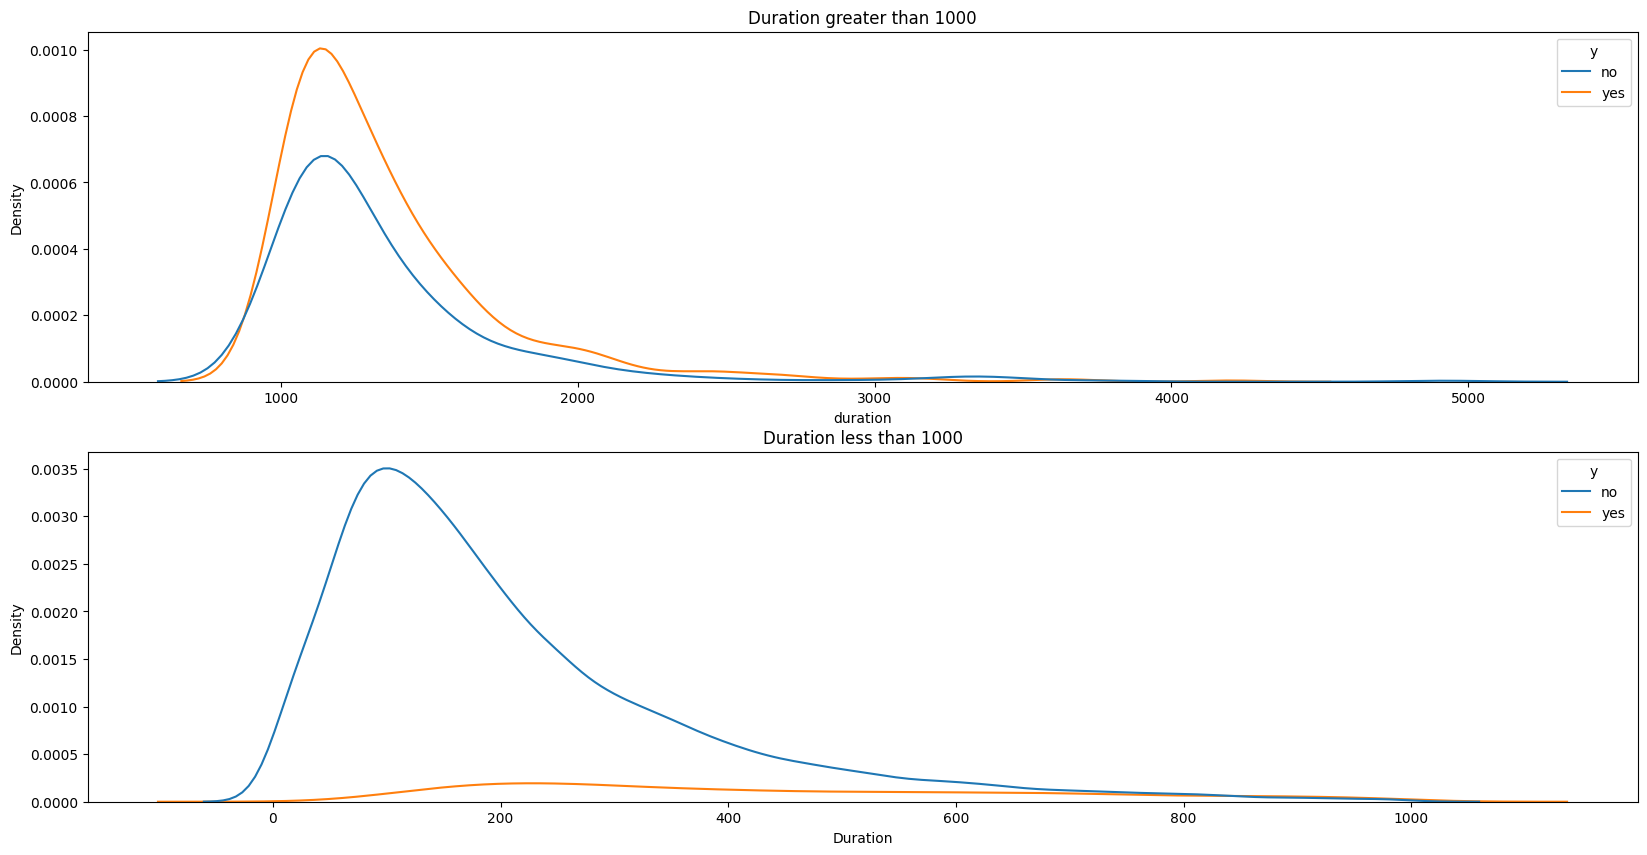

In [36]:
fix, ax = plt.subplots(figsize=(20, 10),nrows=2) 
sns.kdeplot(ax = ax[0], x='duration', data=df.loc[(df['duration']>1000)], hue='y')
plt.xlabel("Duration")
ax[0].set_title("Duration greater than 1000")
sns.kdeplot(ax = ax[1], x='duration', data=df.loc[(df['duration']<1000)], hue='y')
ax[1].set_title("Duration less than 1000");

In [37]:
X = df.drop(columns=df.select_dtypes(include=['object']).columns)
y = df['y']    #target column i.e price range

<Axes: >

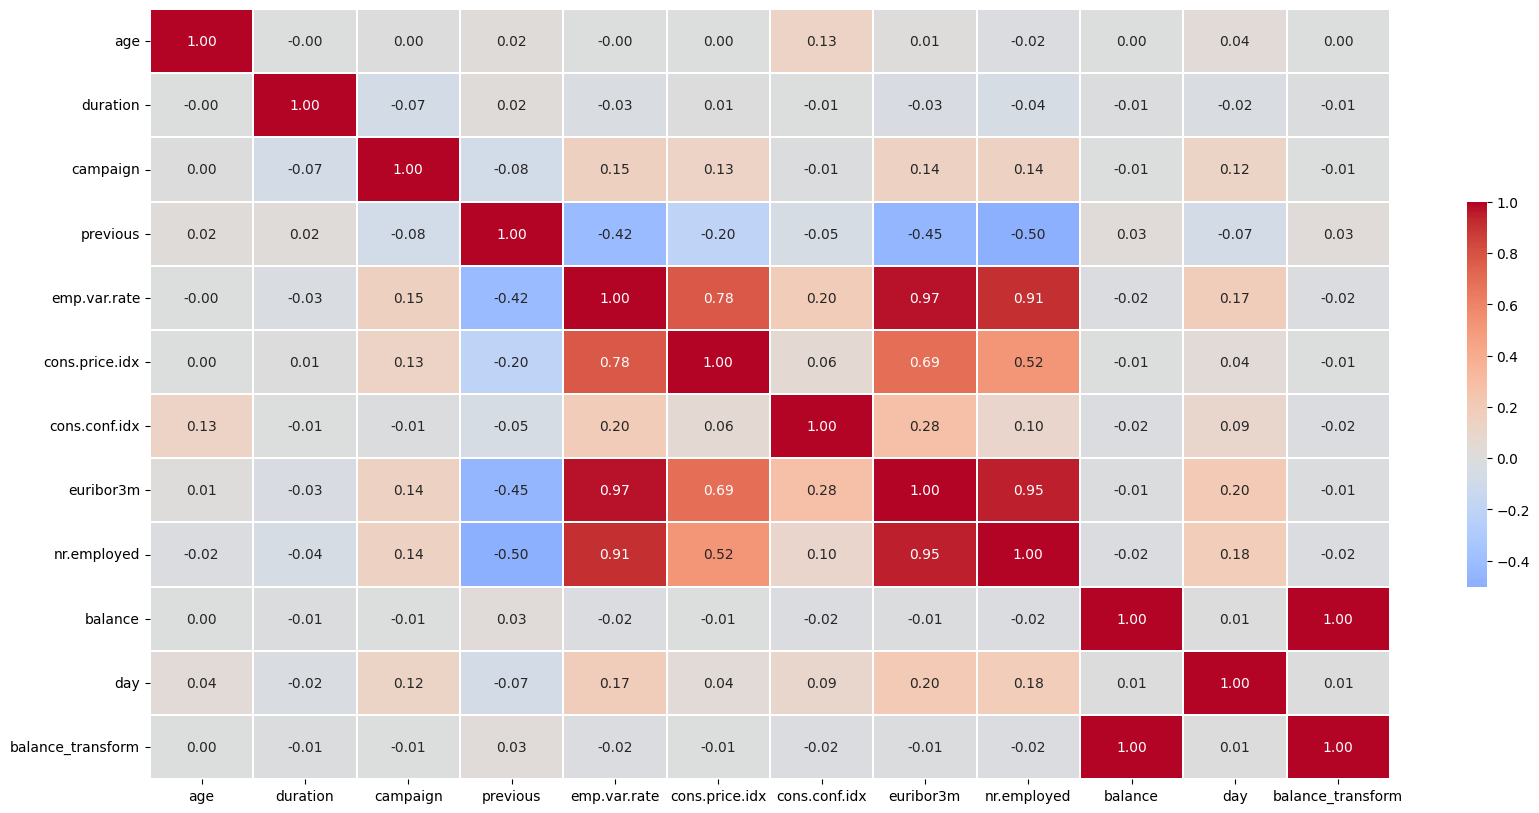

In [38]:
fix, ax = plt.subplots(figsize=(20, 10)) 
sns.heatmap(X.corr(), cmap='coolwarm', center=0, linewidths=.1, cbar_kws={"shrink": .5},annot=True, fmt=".2f")

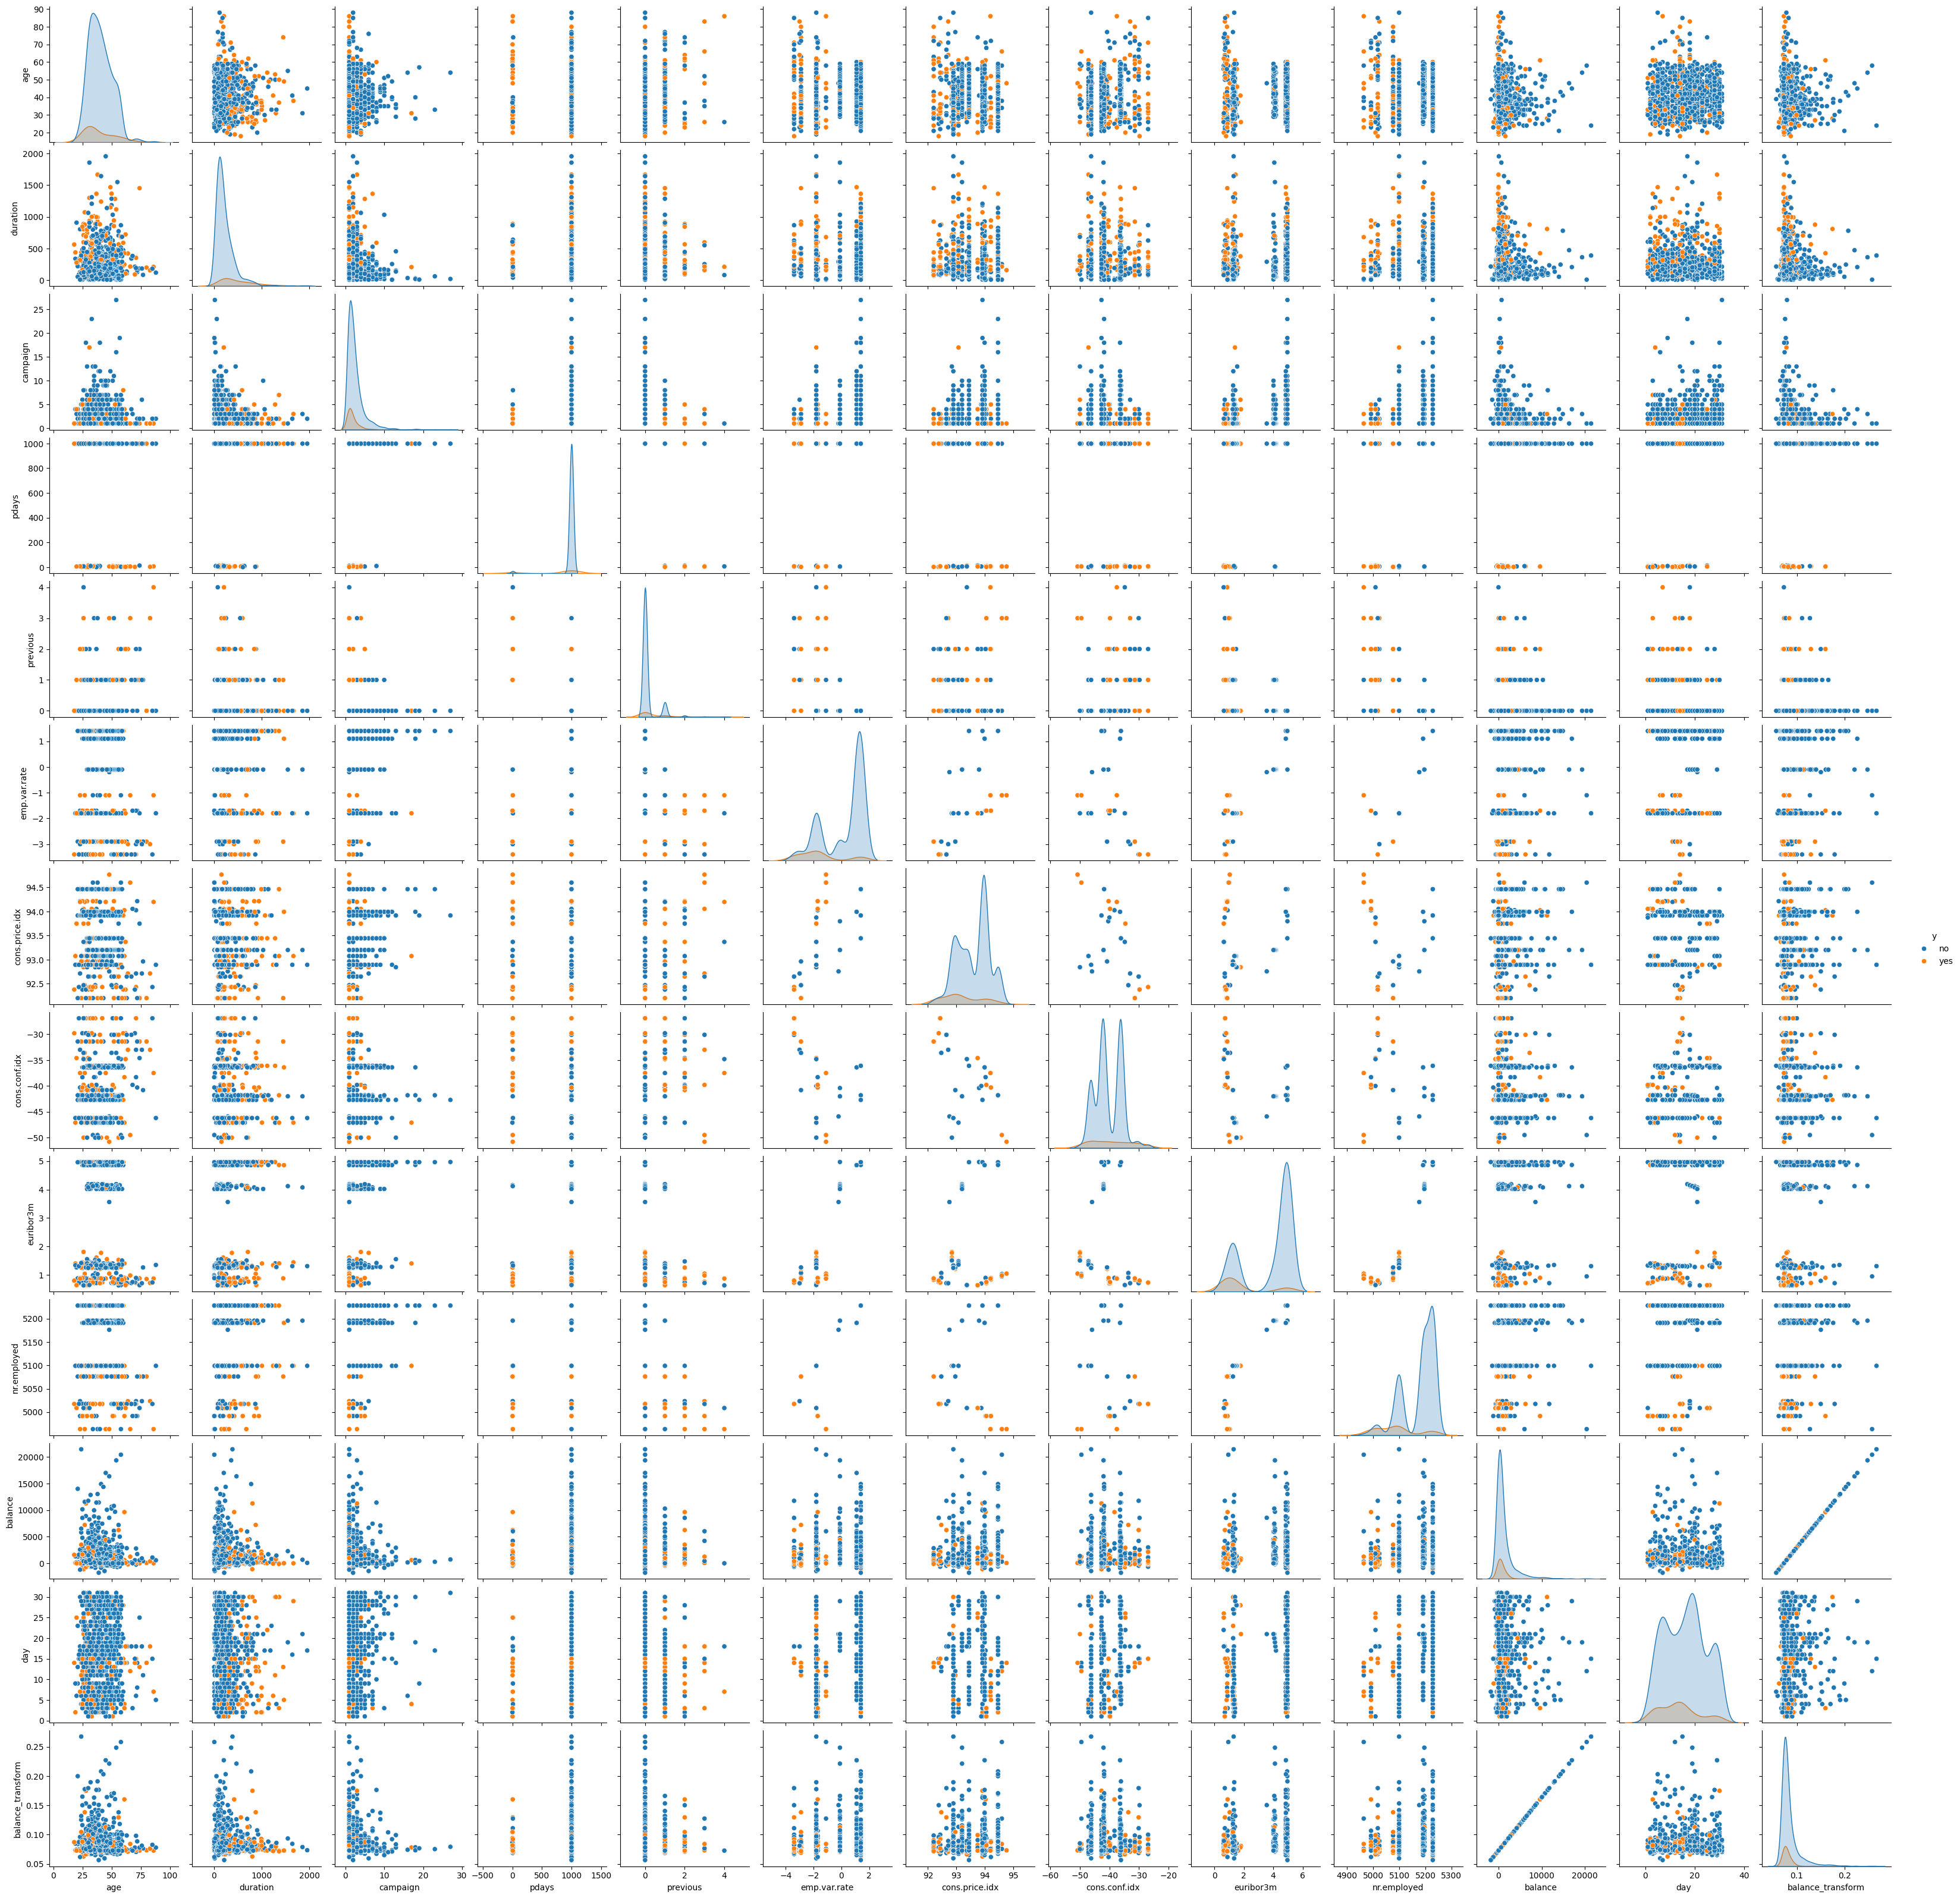

In [34]:
sns.pairplot(df.sample(1000), hue='y')

In [39]:
df.to_csv('bank+marketing/bank_clean.csv', index=False)

In [40]:
df.groupby(['y'])['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64